# Background - Instagram Case Study

We are interested in exploring how the images people consume the most are categorized. This will help us inform what kind of faces should be included in our dataset, since we are building it from scratch and it may be difficult to access/integrate numerous sources. Using Instagram as a case study, we can also asses the magnitude of the data that would be involved in deploying this model in the real world. In order to do this we will use the very simple "Most Followed on Instagram" dataset from ICONOSQUARE.

## Data Dictionary
 Rank  | Followers | Engagement Rate  | Posts on # | Media Posted
  -------------  | -------------| -------------| -------------| -------------
  Most to least followers ranking for the top 100 accounts.| Number of followers.| Average engagement rate of all media. Engagement rate is based on the likes and comments received divided by the number of followers at the time of the post.| Posts on the specific hastag. | Total amount of media posted by the user.
  
  
  

In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msng

## Data Cleaning

In [2]:
df=pd.read_csv('./Instagram_data/most_followed_ig.csv',  encoding='latin-1')

In [3]:
df.head()

,RANK,BRAND,CATEGORIES 1,CATEGORIES 2,FOLLOWERS,ER,iPOSTS ON HASHTAG,MEDIA POSTED
0,1,Selena Gomez,celebrities,musicians,105.4Mæ(=),2.62%æ(1342),14.5Mæ(48),1.2kæ(2135)
1,2,Taylor Swift,celebrities,musicians,95.2Mæ(=),1.96%æ(2040),10.5Mæ(66),958æ(2669)
2,3,Ariana Grande,celebrities,musicians,92.3Mæ(=),1.43%æ(2759),16.9Mæ(41),2.8kæ(824)
3,4,Beyonce,celebrities,musicians,90.6Mæ(=),2.53%æ(1427),9.2Mæ(70),1.4kæ(1897)
4,5,Kim Kardashian West,celebrities,tv,89.3Mæ(=),1.39%æ(2812),5.1Mæ(130),3.6kæ(550)


In [4]:
#Renaming columns
df.columns=['rank','brand','cat_1','cat_2','followers','er','posts_on_#','media_posted']

In [5]:
#Fixing numeric data entries

#followers
df['followers']=[float(df['followers'][i].replace('Mæ(=)','').replace('Mæ(-1)','').replace('Mæ(+1)','')) for i,x in enumerate(df['followers'])]

#er
df['er']=[float(df['er'][i][0:4]) for i,x in enumerate(df['er'])]

#posts_on_#
df['posts_on_#']=[df['posts_on_#'][i].split('M')[0] for i,x in enumerate(df['posts_on_#'])]
df['posts_on_#']=[float(df['posts_on_#'][i].split('k')[0]) for i,x in enumerate(df['posts_on_#'])]

#media_posted
df['media_posted']=[df['media_posted'][i].split('k')[0] for i,x in enumerate(df['media_posted'])]
df['media_posted']=[float(df['media_posted'][i].split('æ')[0]) for i,x in enumerate(df['media_posted'])]

In [6]:
df.head()

,rank,brand,cat_1,cat_2,followers,er,posts_on_#,media_posted
0,1,Selena Gomez,celebrities,musicians,105.4,2.62,14.5,1.2
1,2,Taylor Swift,celebrities,musicians,95.2,1.96,10.5,958.0
2,3,Ariana Grande,celebrities,musicians,92.3,1.43,16.9,2.8
3,4,Beyonce,celebrities,musicians,90.6,2.53,9.2,1.4
4,5,Kim Kardashian West,celebrities,tv,89.3,1.39,5.1,3.6


In [7]:
#Checking the integrity of the data types
df.dtypes

rank              int64
brand            object
cat_1            object
cat_2            object
followers       float64
er              float64
posts_on_#      float64
media_posted    float64
dtype: object

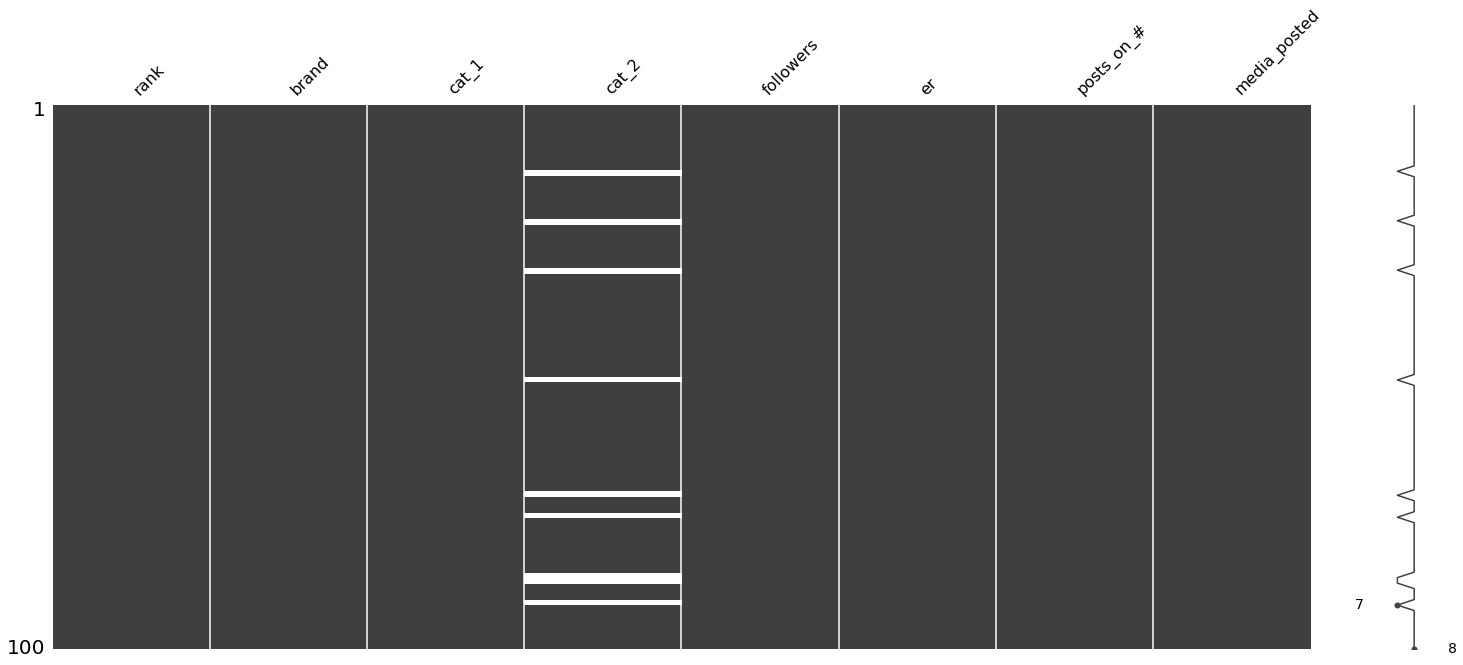

In [8]:
#Visualize missing values
msng.matrix(df);

In [9]:
#Filling NaNs using the relationship between the categories
for i,TF in enumerate(df['cat_2'].isnull()):
    if TF==True:
        df['cat_2'][i]=df['cat_1'][i]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


## EDA

A quick look at engagement confirms people's speculation that this metric drops as followers or posts on a hashtag increase. This is indicated by the correlations map below. 

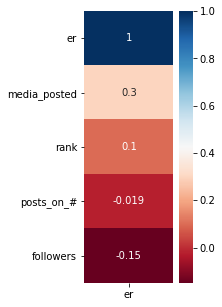

In [10]:
plt.figure(figsize=(2, 5))
sns.heatmap(df.corr()[['er']].sort_values('er', ascending=False),
            annot=True,
            cmap = 'RdBu');

Next, we look at how the top 100 accounts on Instagram do across a few metrics.

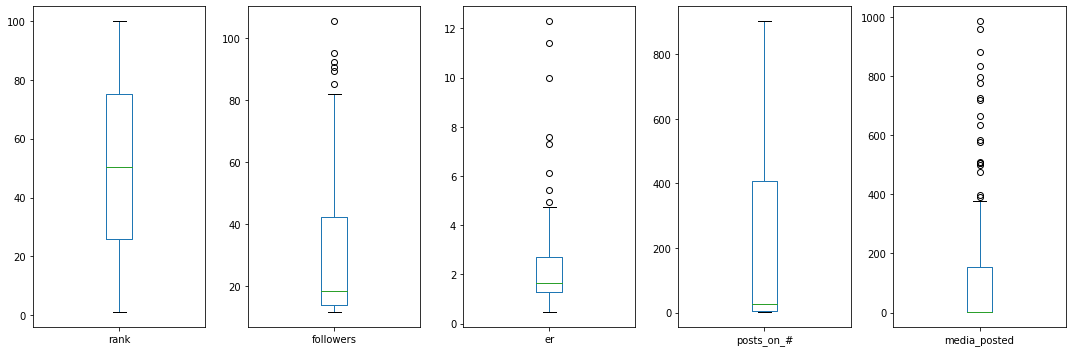

In [11]:
df.plot(kind='box', figsize=(15,5), subplots=True, fontsize=10);
plt.tight_layout();

Our metrics are heavily skewed, so we'll focus on the medians to explore our categories. First, let's look at what they are and how much data is in each.

In [12]:
df['cat_1'].value_counts()

celebrities      75
fashion          13
sport             4
media             3
beauty            2
entertainment     1
other             1
beverages         1
Name: cat_1, dtype: int64

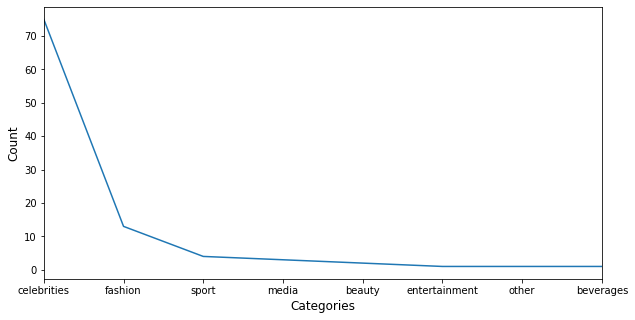

In [13]:
ax=df['cat_1'].value_counts().plot(figsize=(10,5))
ax.set_xlabel("Categories",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
plt.show()


We can see most of the data is in the "celebrities" category, followed by "fashion", assuring faces are predominant on Instagram. Furthermore, there is little presence of sources such as news, politics or science.

We can also see the subcategories (cat_2) below.

In [14]:
df.groupby(['cat_1','cat_2']).count()

rank  brand  followers  er  posts_on_#  \
cat_1         cat_2                                                   
beauty        beauty            1      1          1   1           1   
              retail            1      1          1   1           1   
beverages     beverages         1      1          1   1           1   
celebrities   actors           11     11         11  11          11   
              athletes         18     18         18  18          18   
              entrepreneurs     1      1          1   1           1   
              fashion           1      1          1   1           1   
              media             1      1          1   1           1   
              models            5      5          5   5           5   
              musicians        30     30         30  30          30   
              political         1      1          1   1           1   
              tv                7      7          7   7           7   
entertainment entertainment     1      1          1   1           1   
fashion       fashion           2      2          2   2           2   
              luxury            5      5          5   5           5   
              retail            2      2          2   2           2   
              sport             4      4          4   4           4   
media         media             3      3          3   3           3   
other         other             1      1          1   1           1   
sport         basketball        1      1          1   1           1   
              football          3      3          3   3           3   

                             media_posted  
cat_1         cat_2                        
beauty        beauty                    1  
              retail                    1  
beverages     beverages                 1  
celebrities   actors                   11  
              athletes                 18  
              entrepreneurs             1  
              fashion                   1  
              media                     1  
              models                    5  
              musicians                30  
              political                 1  
              tv                        7  
entertainment entertainment             1  
fashion       fashion                   2  
              luxury                    5  
              retail                    2  
              sport                     4  
media         media                     3  
other         other                     1  
sport         basketball                1  
              football                  3

This tells us that most celebrities are musicians or athletes. Since sports is also a part of fashion, the amount of sports-related content is higher than it originally appears to be.

In [15]:
#Getting the median for each main category
medians=df.groupby('cat_1').median().sort_values('followers', ascending=False)
medians

,rank,followers,er,posts_on_#,media_posted
cat_1,,,,,
entertainment,31,35.00,2.420,1.50,11.4
sport,36,30.95,1.900,7.65,7.2
celebrities,45,20.40,1.780,51.20,3.7
other,51,18.20,2.950,1.40,1.8
fashion,65,15.20,1.000,24.30,3.0
media,72,14.30,1.140,5.30,5.9
beauty,85,12.65,0.875,7.65,6.1
beverages,87,12.60,3.190,25.90,1.3


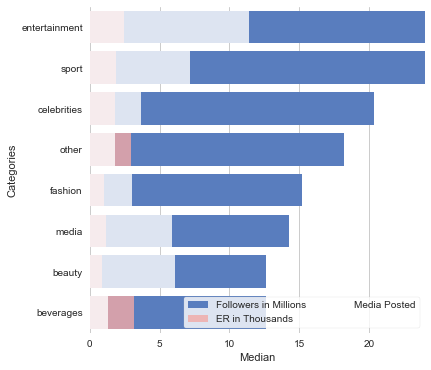

In [16]:
#Median ER and Followers Graph

#style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))


# Plot the maxs
sns.set_color_codes("muted")
sns.barplot(x="followers", y=medians.index, data=medians,
            label="Followers in Millions", color="b")

# Plot the medians
sns.set_color_codes("pastel")
sns.barplot(x="er", y=medians.index, data=medians,
            label="ER in Thousands", color="r",alpha=0.8)

# Plot the medians
sns.set_color_codes("pastel")
sns.barplot(x="media_posted", y=medians.index, data=medians,
            label="Media Posted", color="w",alpha=0.8)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="Categories",
       xlabel="Median")
sns.despine(left=True, bottom=True)

We can see the median amount of followers for any of these categories is in the millions, however, the amount of posts is much smaller (thousands). 

Although there are more popular celebrity accounts than entertainment or sports accounts on Instagram, the Median amount of followers is significantly higher for the later. This is more important for sports, since there is really only one "entertainer" in this dataset. Furthermore, as we confirmed on our heatmap, a greater number of followers does not necessarily mean more engagement. Finally, while "beverage" and "other" accounts have high engagement rates they make relatively few posts.

Overall, our findings inform us that a lot of the edited faces people encounter on Instagram may be enhanced to look natural because they're related to sports while also pertaining to beauty and fashion.